In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage


In [26]:
import pandas as pd

df = pd.read_csv(
    r"C:\Users\Som\Documents\Projects\Hierarchical Clustering\OnlineRetail.csv",
    encoding="latin1"
)

df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [27]:
data = df[['Quantity', 'UnitPrice']]

data = data[(data['Quantity'] > 0) & (data['UnitPrice'] > 0)]

data.head()


,Quantity,UnitPrice
0,6,2.55
1,6,3.39
2,8,2.75
3,6,3.39
4,6,3.39


In [28]:
# SAFE SIZE: 1000–3000 only
sample_data = data.sample(n=2000, random_state=42)


In [29]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(sample_data)


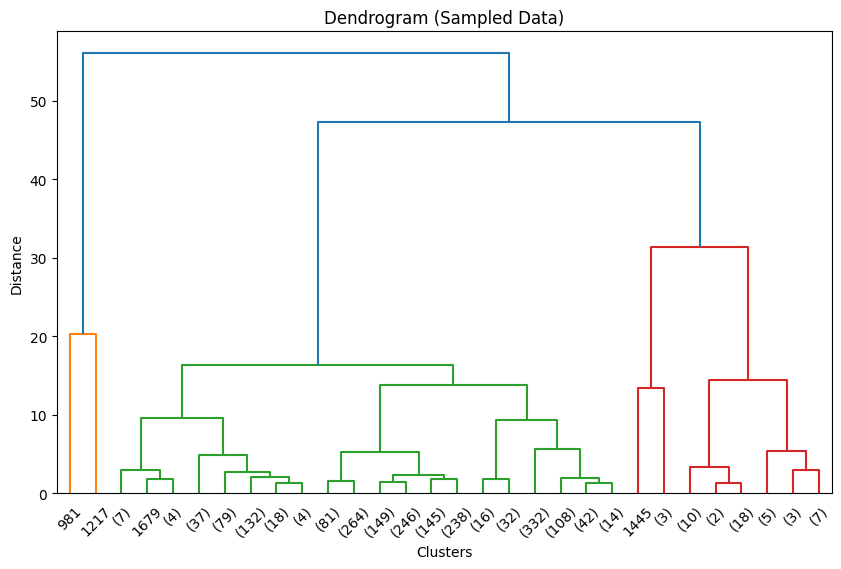

In [30]:
plt.figure(figsize=(10, 6))

linked = linkage(scaled_data, method='ward')

dendrogram(
    linked,
    truncate_mode='lastp',
    p=30
)

plt.title("Dendrogram (Sampled Data)")
plt.xlabel("Clusters")
plt.ylabel("Distance")
plt.show()


In [31]:
model = AgglomerativeClustering(
    n_clusters=3,
    linkage='ward'
)

clusters = model.fit_predict(scaled_data)


In [32]:
sample_data = sample_data.reset_index(drop=True)
sample_data['Cluster'] = clusters

sample_data.head()


,Quantity,UnitPrice,Cluster
0,2,7.95,2
1,4,4.25,2
2,3,4.15,2
3,1,0.65,2
4,6,0.85,2


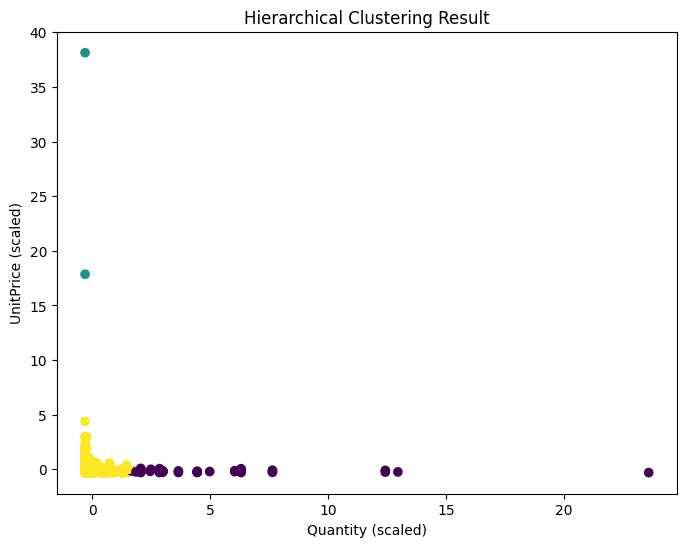

In [33]:
plt.figure(figsize=(8, 6))

plt.scatter(
    scaled_data[:, 0],
    scaled_data[:, 1],
    c=clusters,
    cmap='viridis'
)

plt.xlabel("Quantity (scaled)")
plt.ylabel("UnitPrice (scaled)")
plt.title("Hierarchical Clustering Result")
plt.show()


In [35]:
import pickle
pickle.dump(model, open("model.pkl", "wb"))
pickle.dump(scaler, open("scaler.pkl", "wb"))
